In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.feature_extraction.tests import test_image

### Load Data

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Display the first image in the training data

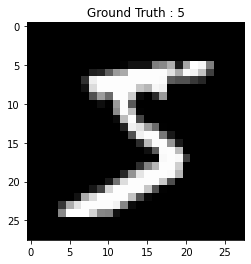

In [6]:
plt.imshow(train_images[0, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

### Process the data
1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [30]:
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

### Convert data to float and scale values between 0 and 1

In [31]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# scale data
train_data /= 255.0
test_data /= 255.0

# change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

### Create the network

In [33]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2661 - accuracy: 0.9227 - val_loss: 0.1207 - val_accuracy: 0.9634
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0903 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9736
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0713 - val_accuracy: 0.9796
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0643 - val_accuracy: 0.9816
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0594 - val_accuracy: 0.9819- loss: 0.020
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0853 - val_acc

## Task 1
Using the history object in the source code, plot the loss and accuracy for both training data and validation data

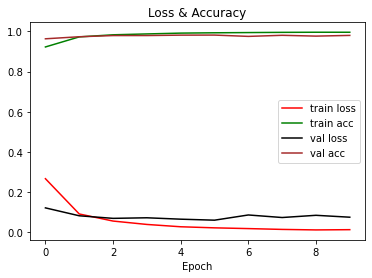

In [34]:
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['accuracy'], color="green")
plt.plot(history.history['val_loss'], color="black")
plt.plot(history.history['val_accuracy'], color="brown")
plt.title('Loss & Accuracy')
plt.xlabel('Epoch')
plt.legend(['train loss', 'train acc', 'val loss', 'val acc'], loc='center right')
plt.show()

# Task 2
Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data.

The prediction for the 44 image in the test dataset is: [3]


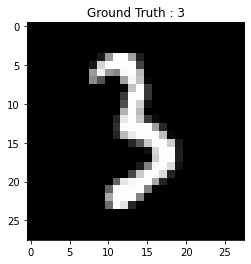

In [43]:
random_index = np.random.randint(100)
predict_test = model.predict_classes(test_data[[random_index], :])
print("The prediction for the {} image in the test dataset is: {}".format(random_index, predict_test))

plt.imshow(test_images[random_index, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[random_index]))
plt.show()

# Task 3
We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens

Epoch 1/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0986 - val_accuracy: 0.9800
Epoch 2/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0808 - val_accuracy: 0.9832
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0841 - val_accuracy: 0.9838
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0948 - val_accuracy: 0.9827
Epoch 5/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0898 - val_accuracy: 0.9836
Epoch 6/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0941 - val_accuracy: 0.9836
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0923 - val_accuracy: 0.9857

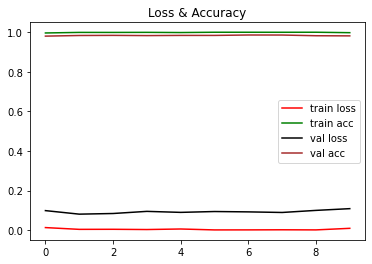

In [41]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(dimData,)))
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss2, test_acc2] = model2.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss2, test_acc2))

plt.plot(history2.history['loss'], color="red")
plt.plot(history2.history['accuracy'], color="green")
plt.plot(history2.history['val_loss'], color="black")
plt.plot(history2.history['val_accuracy'], color="brown")
plt.title('Loss & Accuracy')
plt.legend(['train loss', 'train acc', 'val loss', 'val acc'], loc='center right')
plt.show()

### Report
tanh

|layer1|layer2|loss|accuracy|
|-----|------|-----|------|
|500| 446| 2.37 | 93%|
|256| 128| 2.4 |90%|
|1024| 512| 3.6 |94%|

sigmoid

|layer1|layer2|loss|accuracy|
|-----|------|-----|------|
|500| 446| 3.7 | 92%|
|256| 128| 2.6 |89%|
|1024| 512| 4.6 |90%|

relu

|layer1|layer2|loss|accuracy|
|-----|------|-----|------|
|500| 446| 2.1 | 94%|
|256| 128| 3.4 |92%|
|1024| 512| 2.6 |93%|

# Task 4
Run the same code without scaling the images, how the accuracy changes?

Epoch 1/10
235/235 [==============================] - 7s 29ms/step - loss: 4.0267 - accuracy: 0.8943 - val_loss: 0.5832 - val_accuracy: 0.9347
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.3254 - accuracy: 0.9565 - val_loss: 0.4575 - val_accuracy: 0.9475
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1831 - accuracy: 0.9703 - val_loss: 0.4079 - val_accuracy: 0.9516
Epoch 4/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1108 - accuracy: 0.9788 - val_loss: 0.3798 - val_accuracy: 0.9562
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0873 - accuracy: 0.9829 - val_loss: 0.3187 - val_accuracy: 0.9611
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0800 - accuracy: 0.9848 - val_loss: 0.3441 - val_accuracy: 0.9638
Epoch 7/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0791 - accuracy: 0.9849 - val_loss: 0.3393 - val_accuracy: 0.9638

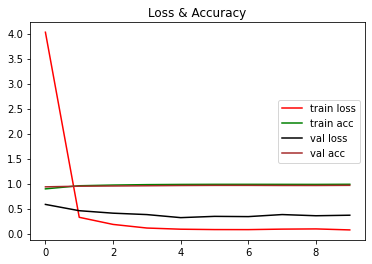

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

train_data = train_data.astype('float')
test_data = test_data.astype('float')

# change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

plt.plot(history.history['loss'], color="red")
plt.plot(history.history['accuracy'], color="green")
plt.plot(history.history['val_loss'], color="black")
plt.plot(history.history['val_accuracy'], color="brown")
plt.title('Loss & Accuracy')
plt.legend(['train loss', 'train acc', 'val loss', 'val acc'], loc='center right')
plt.show()

Accuracy dropped to **96.4%** from **98%** without scaling.